## Saras labb 1.1 

Import the text files

In [1]:
import numpy as np
import matplotlib.pyplot as plt

pikachu = "pikachu.txt" 
with open("pikachu.txt", "r") as file:
    pikachu = file.read()

pichu = "pichu.txt" 
with open("pichu.txt", "r") as file:
        pichu = file.read()


Debugging of the text files

In [2]:
pikachu.split("\n")[1:-1]

pichu.split("\n")[1:-1]

['(20.11541438766307, 28.701809671168824)',
 '(15.200086041781336, 27.095070307714877)',
 '(17.200234546952956, 27.669778220491132)',
 '(16.785685905190583, 34.36654587712494)',
 '(20.8917697133121, 31.480353852465935)',
 '(20.41359589938329, 31.091310056669883)',
 '(22.137436541638763, 26.71138648198097)',
 '(15.695510661035328, 32.291267979503495)',
 '(18.375374557482164, 26.634024937619284)',
 '(15.238377755504562, 28.794554417576478)',
 '(16.749103798428827, 34.895233506365955)',
 '(19.042842304826898, 31.399997598540928)',
 '(15.212287757470909, 30.569497437746463)',
 '(16.59070120549319, 31.846142509898748)',
 '(20.199075502236184, 33.4285192018981)',
 '(19.35953184482573, 32.75999911546245)',
 '(16.763524976325574, 27.290480719641042)',
 '(19.71412547100727, 25.321002439040377)',
 '(21.475443653422612, 28.154530480590818)',
 '(15.051990077424488, 27.67740875975703)',
 '(21.446554014662464, 27.109828435863264)',
 '(20.585115159905815, 34.429097143350546)',
 '(17.722004132143937, 

In [3]:
test_points = "test_points.txt" 
with open("test_points.txt", "r") as file:
    test_points = file.read()

pikachu = [(eval(str(width)), eval(str(height))) for width in range(1, + 1)for height in range(1, + 1)]

pichu = [(eval(str(width)), eval(str(height))) for width in range(1, + 1)for height in range(1, + 1)]


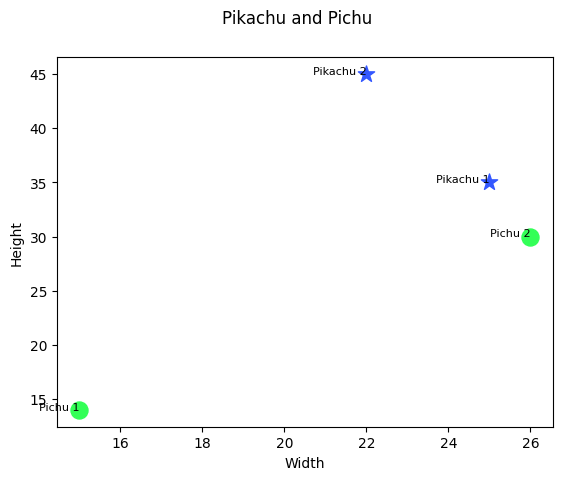

In [11]:
import matplotlib.pyplot as plt

# Definde the color 
pichu_color = '#33FF57'
pikachu_color = '#3357FF'

pikachu = [(25, 35), (22, 45)]  # Sample data Pikachu
pichu = [(15, 14), (26, 30)]     # Sample data Pichus

# Create a scatter plot for Pikachu and Pichu.
for point, name in zip(pikachu, ['Pikachu 1', 'Pikachu 2']):
    plt.scatter(point[0], point[1], c=pikachu_color, s=150, marker='*')
    plt.text(point[0], point[1], name, fontsize=8, ha='right')

for point, name in zip(pichu, ['Pichu 1', 'Pichu 2']):
    plt.scatter(point[0], point[1], c=pichu_color, s=150, marker='o')
    plt.text(point[0], point[1], name, fontsize=8, ha='right')
    
plt.xlabel('Width')  # Set the label for the x-axis
plt.ylabel('Height') # Set the label for the y-axis
plt.suptitle('Pikachu and Pichu')
# Show the plot
plt.show() 


Decision tree classifier

In [5]:
def decision_tree_classify(sample):
    if sample[0] < 20:
        return 'Pichu'
    else:
        return 'Pikachu'

In [6]:
test_data = [(25,35),(15,14), (26,30), (22,45)]
for sample in test_data:
    classification = decision_tree_classify(np.array(sample))
    print(f"Sample with (width, hight): {sample} classified as {classification}")

Sample with (width, hight): (25, 35) classified as Pikachu
Sample with (width, hight): (15, 14) classified as Pichu
Sample with (width, hight): (26, 30) classified as Pikachu
Sample with (width, hight): (22, 45) classified as Pikachu
